<a href="https://colab.research.google.com/github/chewzzz1014/DPhi-Bootcamp/blob/master/notes/deep-learning/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification**

**Import Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Split Data**

In [3]:
# separate input variables and output variable
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
# split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [7]:
X_train.shape[1]  # number of features

13

**Architecture of Model**
- Input Layer : Number of features in X_train (13 in this case)
- First Dense Layer : 32 neurons
- Second Dense Layer : 16 neurons
- Third Dense Layer : 8 neurons
- Output Layer : 1 neuron 

- Output Layer will use `sigmoid function` to give a probability in range [0,1], which is useful in Binary Classification.
- Other layers will use `ReLU (Rectified Linear Units)` as activation function. 

  
    f(x) = max ( 0, x )



**Build Model**

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [9]:
# create a Sequential Model
model = Sequential()

# add layers

# input layer : num of neurons, activation function and input data
model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))

# first hidden layer
model.add(Dense(16, activation="relu"))

# second hidden layer
model.add(Dense(8, activation="relu"))

# output layer
model.add(Dense(1, activation="sigmoid"))

**Compile Model**
- `Loss Function` : We used `binary_crossentropy` in this model. Suitable for binary classification that gives output in form of probablity.
- `Optimizer` : rmsprop is used
- `Learning Rate` : We use 0.001. The range of learning rate is `10^{-6} < x < 1.0`. 
- `Metrics` : To evaluate the model. We use accuracy here, to calculate how often the prediction is correct.

In [10]:
# compile model
from tensorflow.keras.optimizers import RMSprop

# learning rate = 0.001
optimizer = RMSprop(0.001)

# compiling model
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


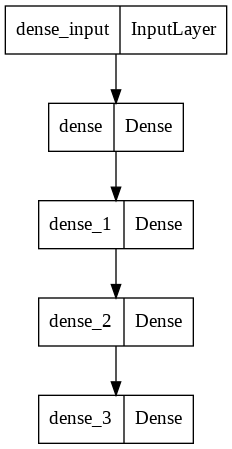

In [12]:
# plot the model
from tensorflow.keras.utils import plot_model

plot_model(model)

**Train Model**
- The model is initially trained for 200 epochs with a batch size of 10. Both `epochs and batch size are hyperparameters` that can be modified to optimise the model.
- `validation_split` : Fraction of the training data to be used as data validation. Will not be trained, and will be used to evaluate the loss and any model metrics at the end of each epoch.
- `verbose` : For printing purposed that makes output more readable.

- `History` (in this notebook):
    - A variable that saves the trained model
    - Tensorflow Keras maintains History object in the background when running a model
    - Keeps all loss values and other metric values in memory for visualizations

In [13]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=200, batch_size=10, verbose=1)

Epoch 1/200
20/20 [==============================] - 3s 25ms/step - loss: 2.3568 - accuracy: 0.6218 - val_loss: 1.2118 - val_accuracy: 0.6531
Epoch 2/200
20/20 [==============================] - 0s 6ms/step - loss: 1.3017 - accuracy: 0.6373 - val_loss: 1.0361 - val_accuracy: 0.7143
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 1.2564 - accuracy: 0.6684 - val_loss: 0.9051 - val_accuracy: 0.6735
Epoch 4/200
20/20 [==============================] - 0s 6ms/step - loss: 1.1264 - accuracy: 0.6218 - val_loss: 1.2140 - val_accuracy: 0.6327
Epoch 5/200
20/20 [==============================] - 0s 7ms/step - loss: 1.2491 - accuracy: 0.6425 - val_loss: 0.9372 - val_accuracy: 0.7551
Epoch 6/200
20/20 [==============================] - 0s 10ms/step - loss: 0.9587 - accuracy: 0.6632 - val_loss: 0.8771 - val_accuracy: 0.7755
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.9280 - accuracy: 0.6684 - val_loss: 0.9816 - val_accuracy: 0.6327
Epoch 8/200

**Model Evaluation**

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.5572 - accuracy: 0.8361


[0.5572218298912048, 0.8360655903816223]

**Model Accuracy Using History Object Created Above**

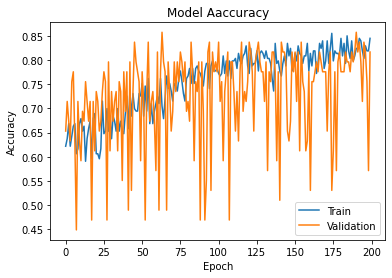

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Aaccuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

**Model Loss**

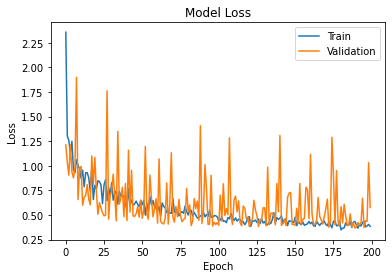

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])